In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('loans_full_schema.csv')
data

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

## Visualizations

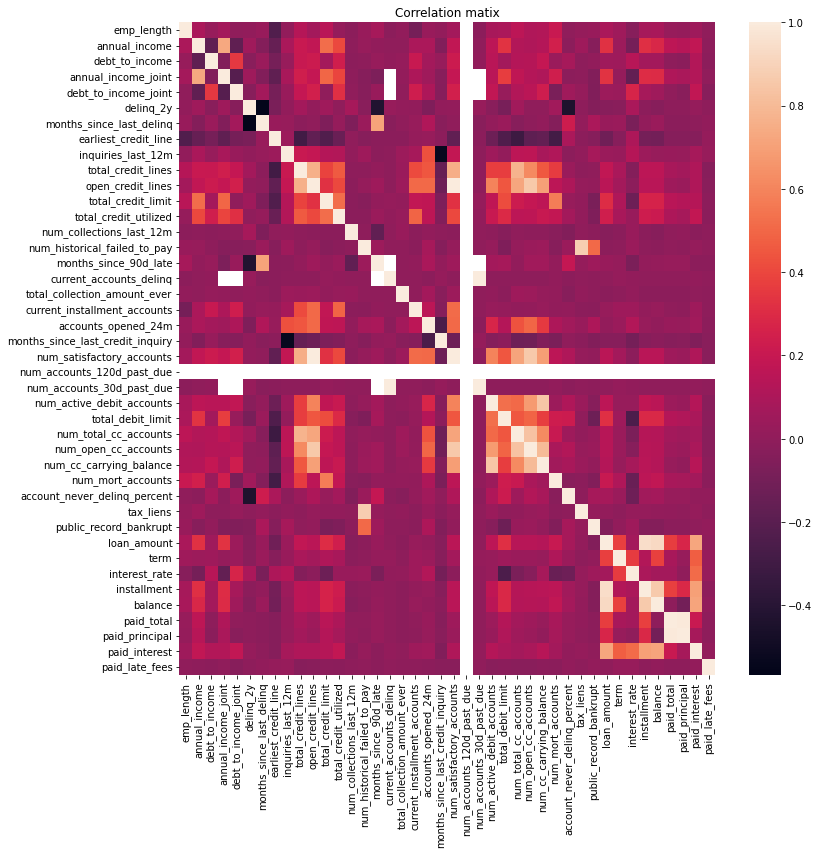

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(data.corr())
plt.title('Correlation matix')
plt.show()

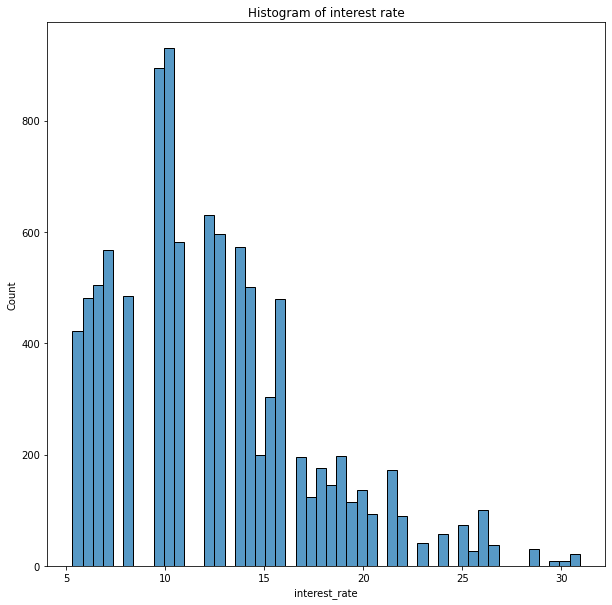

In [5]:
# data['interest_rate'].hist()
plt.figure(figsize=(10,10))
sns.histplot(data['interest_rate'])
plt.title('Histogram of interest rate')
plt.show()

In [6]:
from sklearn.decomposition import PCA

interest_rate = data.corr()['interest_rate']
data_clean = data[interest_rate[(interest_rate>0.1) | (interest_rate<-0.1)].keys()]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   debt_to_income                    9976 non-null   float64
 1   annual_income_joint               1495 non-null   float64
 2   debt_to_income_joint              1495 non-null   float64
 3   earliest_credit_line              10000 non-null  int64  
 4   inquiries_last_12m                10000 non-null  int64  
 5   total_credit_limit                10000 non-null  int64  
 6   accounts_opened_24m               10000 non-null  int64  
 7   months_since_last_credit_inquiry  8729 non-null   float64
 8   total_debit_limit                 10000 non-null  int64  
 9   num_mort_accounts                 10000 non-null  int64  
 10  account_never_delinq_percent      10000 non-null  float64
 11  term                              10000 non-null  int64  
 12  inter

In [7]:
data_final = data_clean.drop(columns=['annual_income_joint','debt_to_income_joint']).dropna().reset_index(drop=True)
data_final

,debt_to_income,earliest_credit_line,inquiries_last_12m,total_credit_limit,accounts_opened_24m,months_since_last_credit_inquiry,total_debit_limit,num_mort_accounts,account_never_delinq_percent,term,interest_rate,paid_interest
0,18.01,2001,6,70795,5,5.0,11100,1,92.9,60,14.07,1015.19
1,5.04,1996,1,28800,11,8.0,16500,0,100.0,36,12.61,150.49
2,21.15,2006,4,24193,13,7.0,4300,0,93.5,36,17.09,106.43
3,10.16,2007,0,25400,1,15.0,19400,0,100.0,36,6.72,566.15
4,57.96,2008,7,69839,6,4.0,32700,0,100.0,36,14.07,754.80
...,...,...,...,...,...,...,...,...,...,...,...,...
8704,22.28,2008,5,199195,8,6.0,44600,1,100.0,36,7.35,556.14
8705,32.38,1994,1,382061,0,1.0,28200,2,82.1,36,19.03,603.75
8706,45.26,2004,0,346402,4,16.0,14900,2,72.2,36,23.88,2238.45
8707,11.99,1999,1,294475,2,5.0,46000,6,100.0,36,5.32,391.43


[9.84091468e-01 1.59014587e-02 7.06003599e-06 5.95111071e-09
 2.52891149e-09 2.12044710e-09 1.34437830e-09 1.00596082e-09
 2.38587865e-10 9.14336473e-11 5.16485675e-11]
[14.07 12.61 17.09 ... 23.88  5.32 10.91]


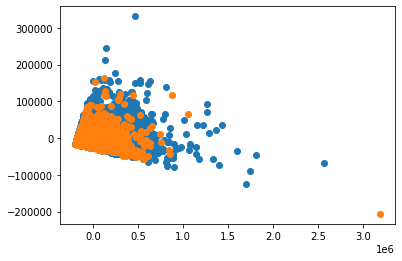

In [8]:
X = data_final.drop(columns=['interest_rate']).values
y = data_final['interest_rate'].values

pca = PCA()
X_pca=pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(y)
plt.scatter(X_pca[y<15,0],X_pca[y<15,1])
plt.scatter(X_pca[y>=15,0],X_pca[y>=15,1])

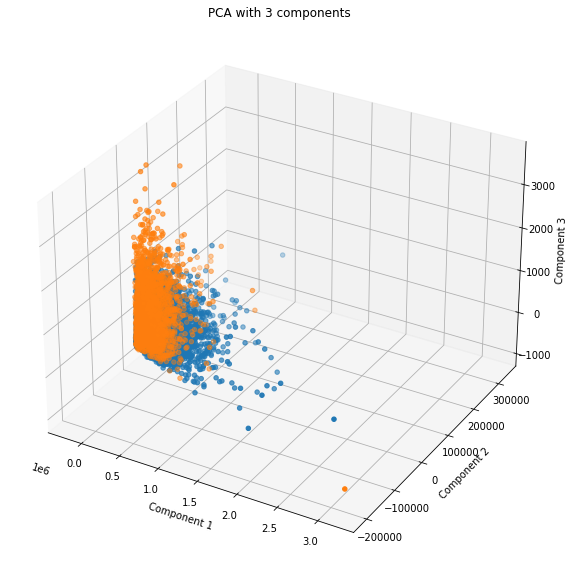

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')


xa = X_pca[y<15,0]
ya = X_pca[y<15,1]
za = X_pca[y<15,2]

ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")

ax.scatter(xa, ya, za)


xb = X_pca[y>=15,0]
yb = X_pca[y>=15,1]
zb = X_pca[y>=15,2]
ax.scatter(xb, yb, zb)
plt.title('PCA with 3 components')
plt.show()

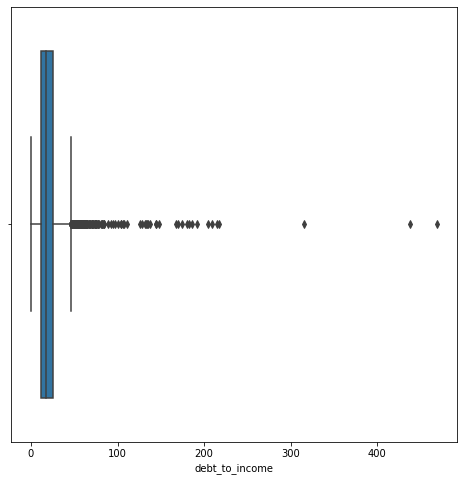

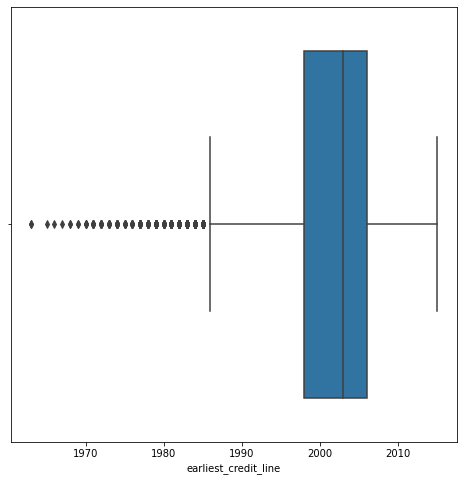

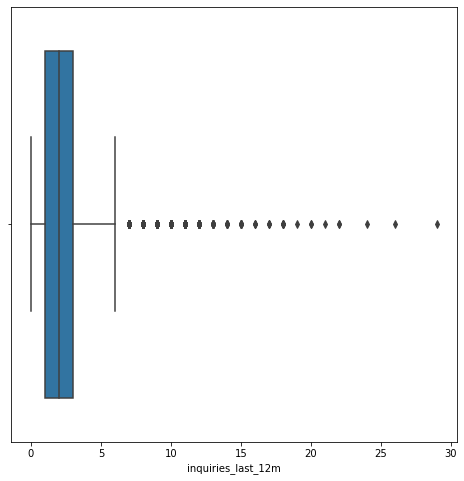

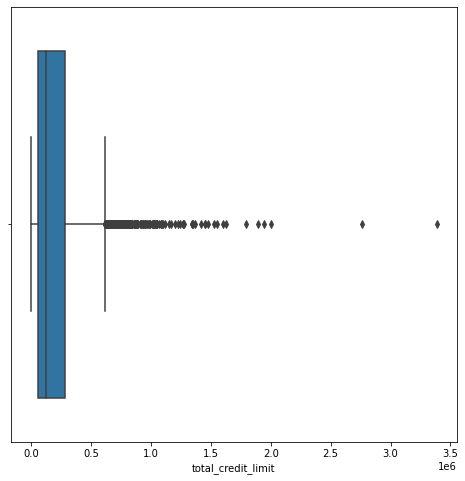

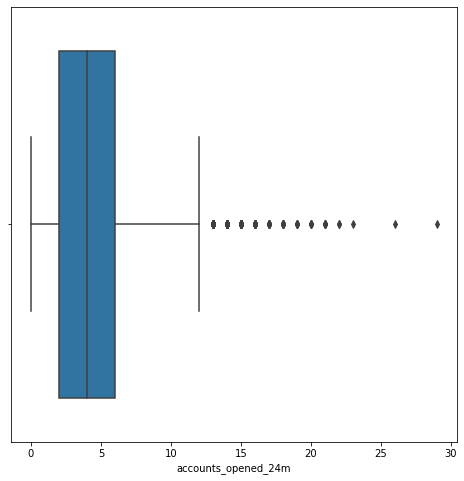

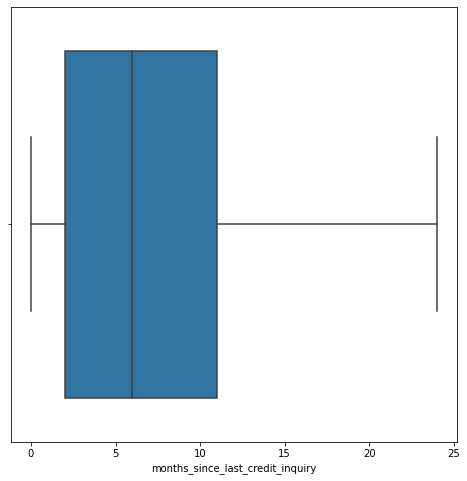

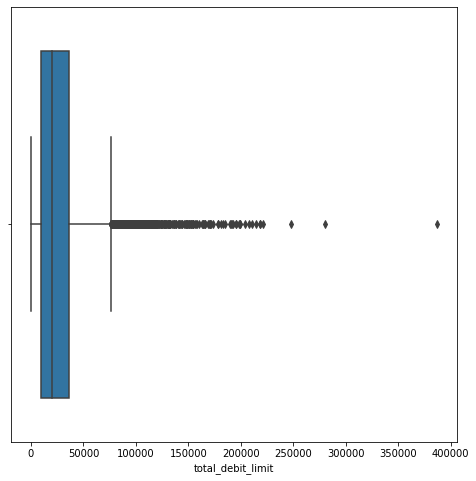

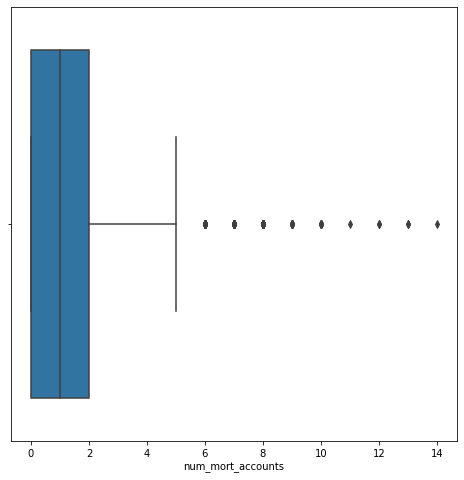

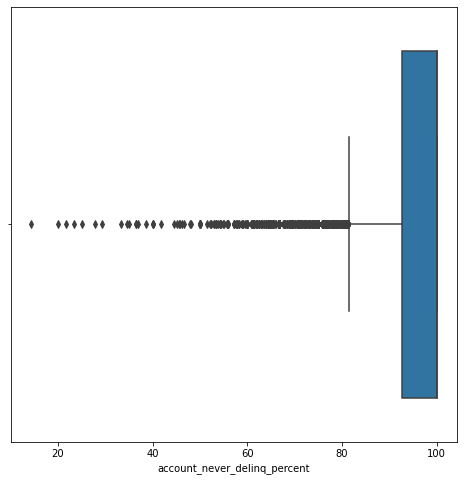

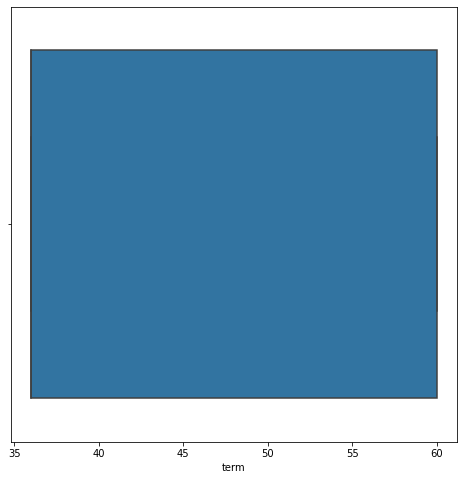

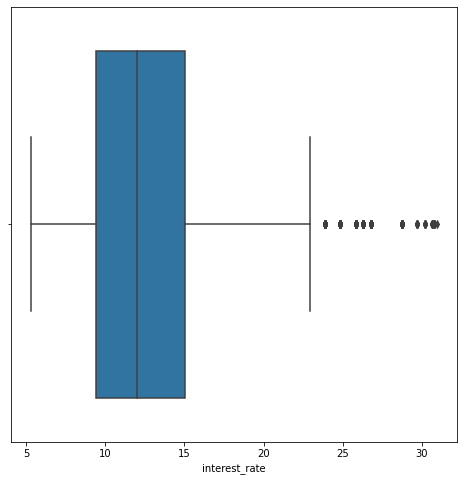

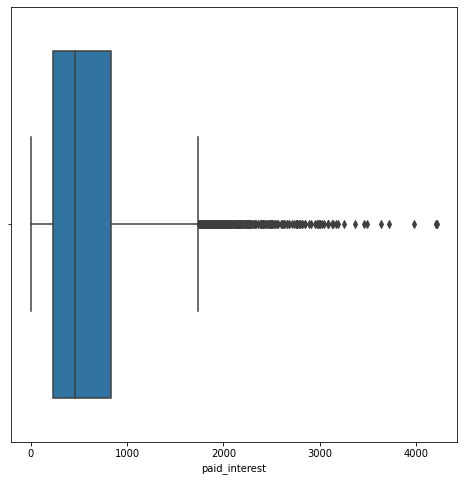

In [10]:
data_final
for i in data_final.columns:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=data_final[i])
    plt.show()

In [11]:
interest_rate = data.corr()['interest_rate']
data_clean = data[interest_rate[(interest_rate>0.1) | (interest_rate<-0.1)].keys()]
data_final_state = data_clean.drop(columns=['annual_income_joint','debt_to_income_joint']).dropna()
data_final_state['state'] = data['state'].iloc[data_final.index]
data_final_state

,debt_to_income,earliest_credit_line,inquiries_last_12m,total_credit_limit,accounts_opened_24m,months_since_last_credit_inquiry,total_debit_limit,num_mort_accounts,account_never_delinq_percent,term,interest_rate,paid_interest,state
0,18.01,2001,6,70795,5,5.0,11100,1,92.9,60,14.07,1015.19,NJ
1,5.04,1996,1,28800,11,8.0,16500,0,100.0,36,12.61,150.49,HI
2,21.15,2006,4,24193,13,7.0,4300,0,93.5,36,17.09,106.43,WI
3,10.16,2007,0,25400,1,15.0,19400,0,100.0,36,6.72,566.15,PA
4,57.96,2008,7,69839,6,4.0,32700,0,100.0,36,14.07,754.80,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22.28,2008,5,199195,8,6.0,44600,1,100.0,36,7.35,556.14,NaN
9996,32.38,1994,1,382061,0,1.0,28200,2,82.1,36,19.03,603.75,NaN
9997,45.26,2004,0,346402,4,16.0,14900,2,72.2,36,23.88,2238.45,NaN
9998,11.99,1999,1,294475,2,5.0,46000,6,100.0,36,5.32,391.43,NaN


/home/hlias/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


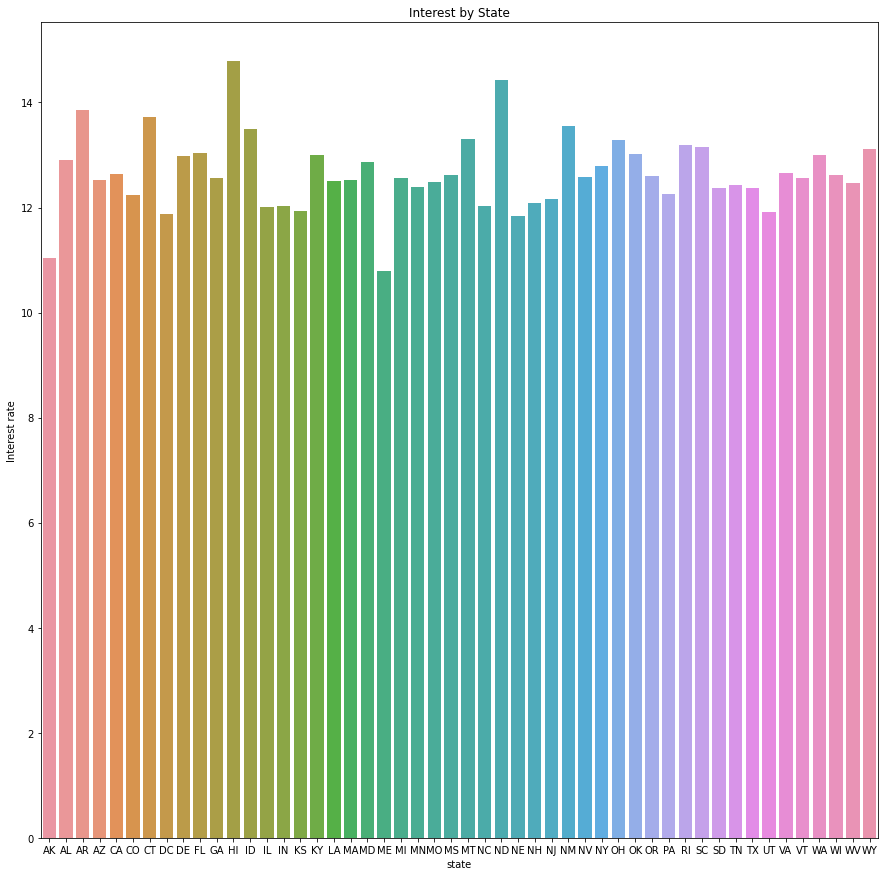

In [12]:
groups = data_final_state.groupby(by='state').mean()
inter_states = groups['interest_rate']
plt.figure(figsize=(15,15))
sns.barplot(inter_states.keys(),inter_states.values)
plt.title('Interest by State')
plt.ylabel('Interest rate')
plt.show()

## Machine Learning models and results

In [13]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6967, 11), (1742, 11), (6967,), (1742,))

In [15]:
model_svr = SVR()
model_forest = RandomForestRegressor()

# Train
model_svr.fit(x_train,y_train)
model_forest.fit(x_train,y_train)

# Evaluate
y_pred_svr = model_svr.predict(x_test)
y_pred_forest = model_forest.predict(x_test)

print('Mean absolute error for SVR is: ',mean_absolute_error(y_test,y_pred_svr))
print('Mean squared error for SVR is: ',mean_squared_error(y_test,y_pred_svr))

print('Mean absolute error for Random forest is: ',mean_absolute_error(y_test,y_pred_forest))
print('Mean squared error for Random forest is: ',mean_squared_error(y_test,y_pred_forest))

Mean absolute error for SVR is:  3.652793807515678
Mean squared error for SVR is:  23.60437969143342
Mean absolute error for Random forest is:  2.8190802525832375
Mean squared error for Random forest is:  13.842538374121697


/home/hlias/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hlias/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


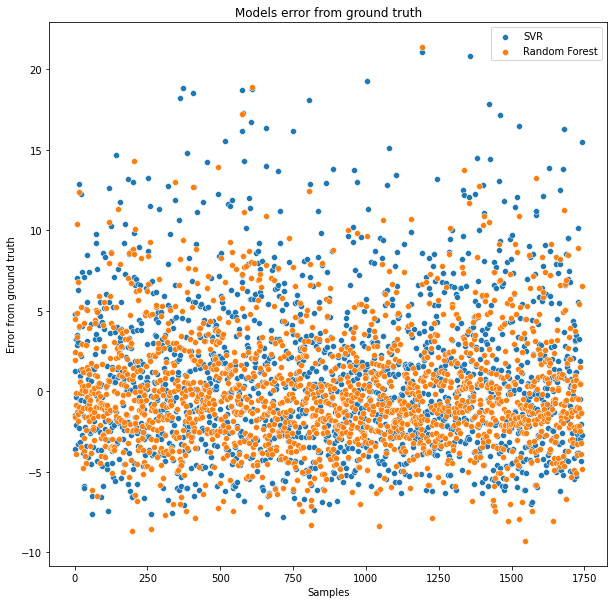

In [16]:
plt.figure(figsize=(10,10))

sns.scatterplot(np.arange(0,y_test.shape[0]),y_test-y_pred_svr)
sns.scatterplot(np.arange(0,y_test.shape[0]),y_test-y_pred_forest)
plt.xlabel('Samples')
plt.ylabel('Error from ground truth')
plt.title('Models error from ground truth')
plt.legend(['SVR','Random Forest'])